# Импорт библиотек

In [185]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df = pd.read_csv('hour.csv')

# Предобработка данных

In [186]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Датасет содержит обезличенные почасовые данные об аренде велосипедов за 2011-2012 годы в определенном сервисе аренды.
Включает следующие столбцы:
* instant - id аренды
* dteday - дата аренды
* season - время года (1 - зима, 2 - весна, 3 - лето, 4 - осень)
* yr - год (0 - 2011, 1 - 2012)
* mnth - месяц
* hr - час
* holiday - является ли день национальным праздником
* weekday - день недели
* workingday - является ли день будним
* weathersit - погода (1 - ясно, 2 - облачно, 3 - легкий снег/дождь, 4 - сильный снег/дождь)
* temp - температура в градусах Цельсия (деленная на 100)
* atemp - температура по ощущениям
* hum - влажность воздуха
* windspeed - скорость ветра
* casual - количество незарегистрированных пользователей
* registered - количество зарегистрированных пользователей
* cnt - общее количество начатых поездок за час

В качестве отклика возьмем столбец cnt. У нас много предикторов, поэтому стоит сократить их количество.

Для начала проверим полноту данных.

In [187]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Скорее всего, из-за того, что эти данные собраны автоматически, пропусков нет.

Сразу можно избавиться от нескольких признаков:
* instant не дает нам никакой полезной информации
* данные о зарегистрированных и незарегистрированных пользователях также никак не влияют на отклик

In [188]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Рассмотрим столбцы mnth и season. Нет смысла оставлять оба признака, поэтому оставим season как более информативный.

In [189]:
df.drop('mnth', axis=1, inplace=True)
df.head(5)

,dteday,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [190]:
df.drop('weekday', axis=1, inplace=True)

Столбец weekday также довольно неинформативен, рассмотрим остальные признаки, связанные с днем.

Выведем средние значения количества поездок в праздничные и будние дни.

In [191]:
df[df.holiday == 1].cnt.mean()

156.87

In [192]:
df[df.workingday == 1].cnt.mean()

193.20775389801938

В среднем количество поездок в праздники меньше. То есть наличие праздника в тот или иной день можно оставить в качестве признака, влияющего на отклик.

In [193]:
df.head(5)

,dteday,season,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,0,0,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,0,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,2,0,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,3,0,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,4,0,0,1,0.24,0.2879,0.75,0.0,1


Взглянем на данные о температуре. Так как воспринимаемая температура складывается из реальной температуры, влажности и скорости ветра среди прочих параметров, оставим только ее в качестве температурного показателя. Также отобразим график температуры для оценки значимости ее колебаний.

<Axes: >

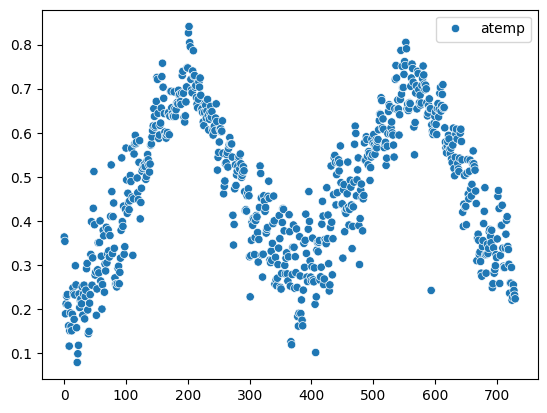

In [194]:
df.drop(['temp', 'hum', 'windspeed'], axis=1, inplace=True)
sns.scatterplot(df.groupby('dteday', as_index=False).mean()[['atemp']])

Видно, что сезонные колебания довольно заметны, поэтому данные о температуре оставим в качестве одного из предикторов.

In [195]:
df.head(5)

,dteday,season,yr,hr,holiday,workingday,weathersit,atemp,cnt
0,2011-01-01,1,0,0,0,0,1,0.2879,16
1,2011-01-01,1,0,1,0,0,1,0.2727,40
2,2011-01-01,1,0,2,0,0,1,0.2727,32
3,2011-01-01,1,0,3,0,0,1,0.2879,13
4,2011-01-01,1,0,4,0,0,1,0.2879,1


Дата поездки больше нам не пригодится, как и данные о годе, опустим данные признаки.

In [196]:
df.drop(['dteday', 'yr'], axis=1, inplace=True)
df.head(5)

,season,hr,holiday,workingday,weathersit,atemp,cnt
0,1,0,0,0,1,0.2879,16
1,1,1,0,0,1,0.2727,40
2,1,2,0,0,1,0.2727,32
3,1,3,0,0,1,0.2879,13
4,1,4,0,0,1,0.2879,1


# Создание и обучение модели

Первой мыслью касаемо дальнейших действий с данными было создание модели линейной регрессии, однако при повторном взгляде на график температуры становится понятной следующая проблема: очевиден сезонный характер колебаний, поэтому модель линейной регрессии в данном случае неприменима. К тому же, вычисление точного значения спроса вряд ли целесообразно.

Поэтому можно переформулировать задачу и трансформировать ее в задачу классификации. Сделать это можно, превратив отклик cnt в набор интервалов, где каждый интервал соответствует классу.

In [197]:
df.cnt.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

Интервалы сформируем исходя из квартилей, сформировав таким образом равномерное распределение. Итак, первый интервал будет включать значения от 1 до 39 (очень низкий спрос), от 40 до 141 (низкий спрос), от 142 до 280 (средний спрос) и более 280 (высокий спрос).

In [198]:
df[['cnt']] = pd.DataFrame(df.cnt.apply(lambda x: 1 if x < 40 else 2 if x < 142 else 3 if x < 281 else 4))
df.cnt.value_counts()

cnt
3    4354
4    4354
2    4352
1    4319
Name: count, dtype: int64

Теперь можно приступать к задаче классификации. Будем использовать KNeighborsClassifier как одну из моделей, поддерживающих небинарную классификацию.

Для начала разобьем датасет на обучающую и тестовую выборки.

In [199]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('cnt', axis=1), df.cnt, test_size=0.25, stratify=df.cnt)

Проведем все стандартные процедуры для обучения и тестирования модели, в качестве метрики используем точность. Проверим на разных входных параметрах модели.

In [200]:
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    print(float(classification_report(y_test, pred)[355:359]))

0.68
0.7
0.71
0.73
0.72
0.73
0.72
0.73


Видно, что при заданных параметрах точность упирается в потолок - 0.75, что вполне неплохо для такой относительно простой модели.

Таким образом, по итогу мы имеем модель, способную с относительно хорошей точностью предсказать спрос на арендные велосипеды в зависимости от сезона, времени дня и погоды. Для улучшения результатов, вероятно, стоило бы поискать выбросы в данных.